In [4]:
import os
from PIL import Image


In [32]:



folder_to_partition = 'MOT20/MOT20-07'

partition_counter = 1

# print the dimensions of the image in the folder
image_path = os.path.join(folder_to_partition, '000001.jpg')
image = Image.open(image_path)
width, height = image.size
print("Dimensions of the image: ", width, height)


Dimensions of the image:  1920 1080


In [33]:
# let's say i want images of 400x400
partition_width = 400
partition_height = 400


# create paritions with strides of 200 pixels
stride = 200


In [34]:

for filename in sorted(os.listdir(folder_to_partition)):
    partition_counter = 1
    

    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(folder_to_partition, filename)
        image = Image.open(image_path)
        width, height = image.size

        # create the partitions
        for i in range(0, width - partition_width, stride):
            for j in range(0, height - partition_height, stride):
                partition = image.crop((i, j, i+partition_width, j+partition_height))

                # Save the partition
                folder_to_output = f'{folder_to_partition}-{partition_counter:03d}'
                os.makedirs(folder_to_output, exist_ok=True)

                partition.save(os.path.join(folder_to_output, filename))
                partition_counter += 1


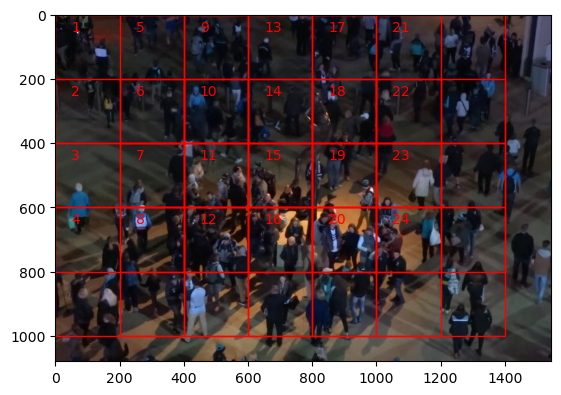

In [31]:
# show the image 000001.jpg with overlaid grid and a number on each partition to show the stride

# a partition is of size 400x400
# stride is 200

# show the partition label in the center of the top left corner of the partition

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(image)
partition_counter = 1
for i in range(0, width - partition_width, stride):
    for j in range(0, height - partition_height, stride):
        rect = patches.Rectangle((i, j), partition_width, partition_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(i+50, j+50, str(partition_counter), color='red')
        partition_counter += 1


plt.show()

